In [2]:
df = pd.read_csv('PJME_hourly.csv')

In [3]:
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)

In [4]:
color_pal = sns.color_palette()

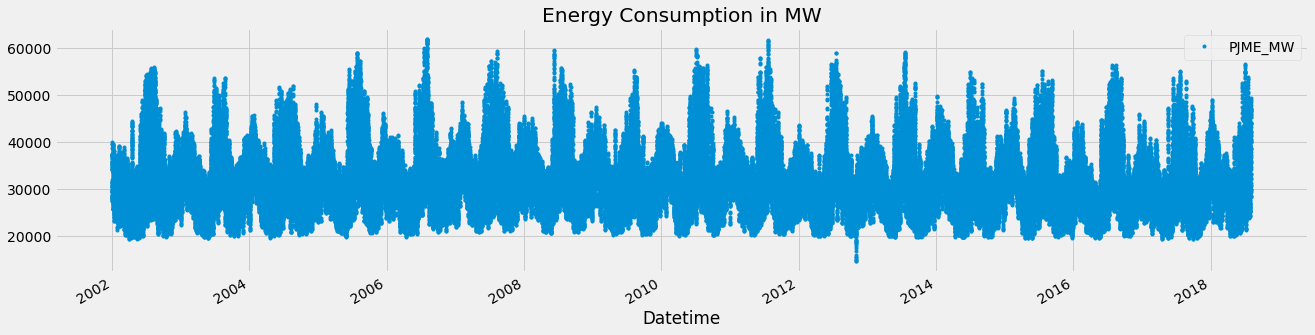

In [5]:
df.plot(style = '.',
figsize=(20,5),
color=color_pal[0],
title = 'Energy Consumption in MW')
plt.show();

## Train/Split

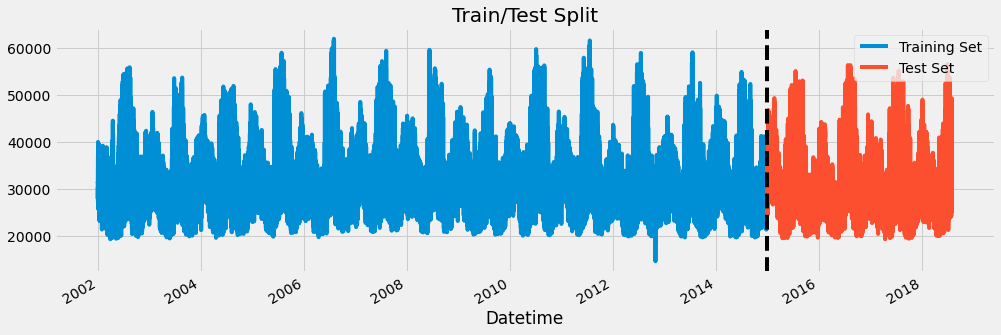

In [6]:
## We will take datas until 01.01.2015 as training data 'X' = train, 'y' = 'test'

train = df.loc[df.index < '01-01-2015']
test= df.loc[df.index >= '01-01-2015']

fig,ax = plt.subplots(figsize =(15,5))
train.plot(ax=ax, label='Training Set', title = 'Train/Test Split')
test.plot(ax=ax,label='Test Set')
ax.axvline('01-01-2015',color='black',ls ='--')
ax.legend(['Training Set','Test Set'])
plt.show()

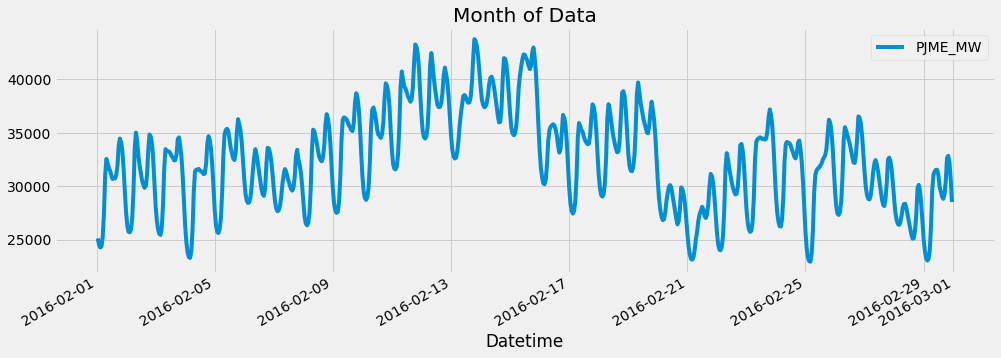

In [7]:
## Lets see one month of the data

df.loc[(df.index > '02-01-2016') &
       (df.index < '03-01-2016')].plot(figsize = (15,5), title ='Month of Data');

## Feature Creation

In [8]:
## Lets create more future for our XBOOST model

## With this unique function below we are going to have more reliable features for our model.

def create_features(df):
    df['hour'] = df.index.hour
    df['Day of Week'] = df.index.dayofweek
    df['quarter'] =df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df = df.copy()
    return df

In [9]:
create_features(df)

,PJME_MW,hour,Day of Week,quarter,month,year,dayofyear
Datetime,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,4,12,2002,365
2002-12-31 02:00:00,25147.0,2,1,4,12,2002,365
2002-12-31 03:00:00,24574.0,3,1,4,12,2002,365
2002-12-31 04:00:00,24393.0,4,1,4,12,2002,365
2002-12-31 05:00:00,24860.0,5,1,4,12,2002,365
...,...,...,...,...,...,...,...
2018-01-01 20:00:00,44284.0,20,0,1,1,2018,1
2018-01-01 21:00:00,43751.0,21,0,1,1,2018,1
2018-01-01 22:00:00,42402.0,22,0,1,1,2018,1


In [10]:
df.head()

,PJME_MW,hour,Day of Week,quarter,month,year,dayofyear
Datetime,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,4,12,2002,365
2002-12-31 02:00:00,25147.0,2,1,4,12,2002,365
2002-12-31 03:00:00,24574.0,3,1,4,12,2002,365
2002-12-31 04:00:00,24393.0,4,1,4,12,2002,365
2002-12-31 05:00:00,24860.0,5,1,4,12,2002,365


## Feature/Target Relationship

Text(0.5, 1.0, 'Electicity Consumption per Hour')

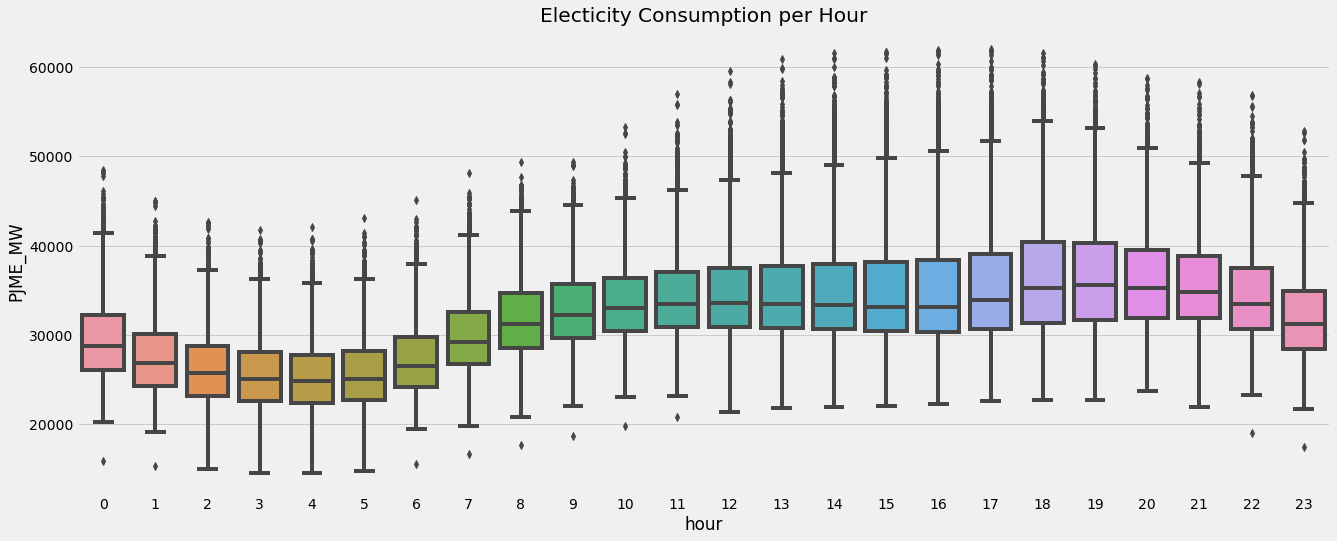

In [11]:
fig,ax = plt.subplots(figsize = (20,8))
sns.boxplot(data=df, x ='hour', y = 'PJME_MW')
ax.set_title('Electicity Consumption per Hour')

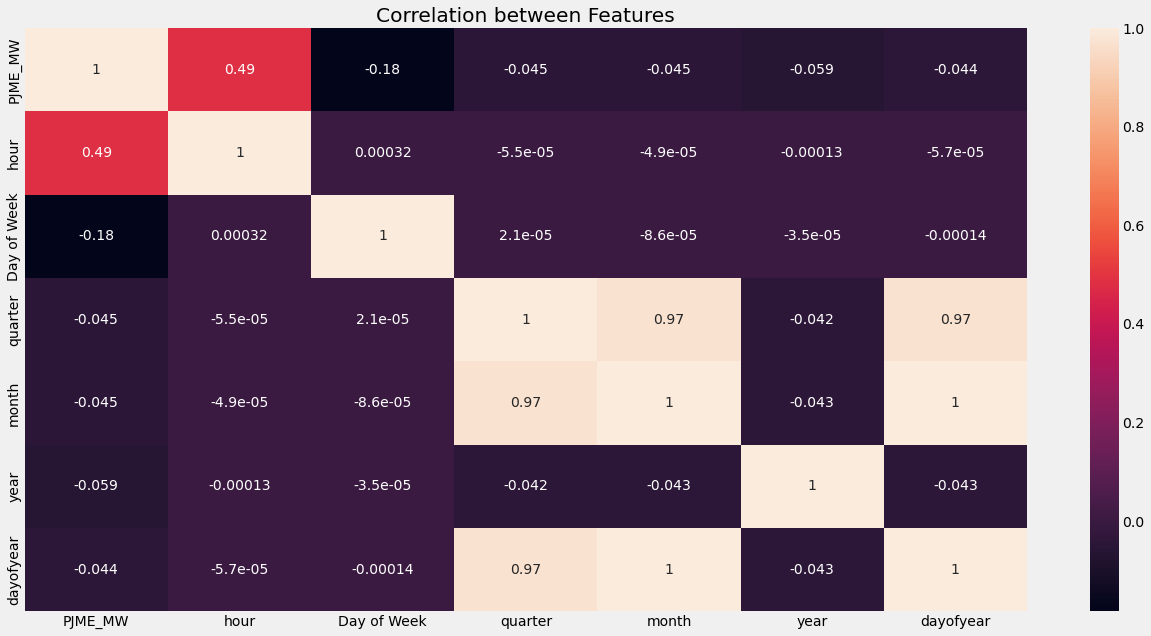

In [12]:
fig,ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
ax.set_title('Correlation between Features');

## Model Creation

In [13]:
Train = create_features(train)
Test = create_features(test)
Features = ['hour','Day of Week','quarter','month','year','dayofyear']
Target = 'PJME_MW'

C:\Users\Internet-Pc\AppData\Local\Temp\ipykernel_10408\3761690939.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
C:\Users\Internet-Pc\AppData\Local\Temp\ipykernel_10408\3761690939.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day of Week'] = df.index.dayofweek
C:\Users\Internet-Pc\AppData\Local\Temp\ipykernel_10408\3761690939.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [14]:
X_train = Train[Features]
y_train = Train[Target]

X_test = Test[Features]
y_test = Test[Target]

In [15]:
## We will use XBOOSTregressor to fit our data

reg = xgb.XGBRegressor(n_estimator=1000,early_stopping_rounds = 50)
reg.fit(X_train,y_train,
        eval_set=[(X_train,y_train),(X_test,y_test)],
        verbose =100)

[16:01:20] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:23192.08347	validation_1-rmse:22262.72116
[60]	validation_0-rmse:1938.07648	validation_1-rmse:4240.82202


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimator=1000,
             n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
             random_state=0, reg_alpha=0, ...)

In [16]:
reg.feature_importances_

array([0.40062666, 0.09024289, 0.02252764, 0.33574155, 0.03168125,
       0.11917996], dtype=float32)

In [17]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index = reg.feature_names_in_,columns=['importance'])

In [18]:
fi

,importance
hour,0.400627
Day of Week,0.090243
quarter,0.022528
month,0.335742
year,0.031681
dayofyear,0.119180


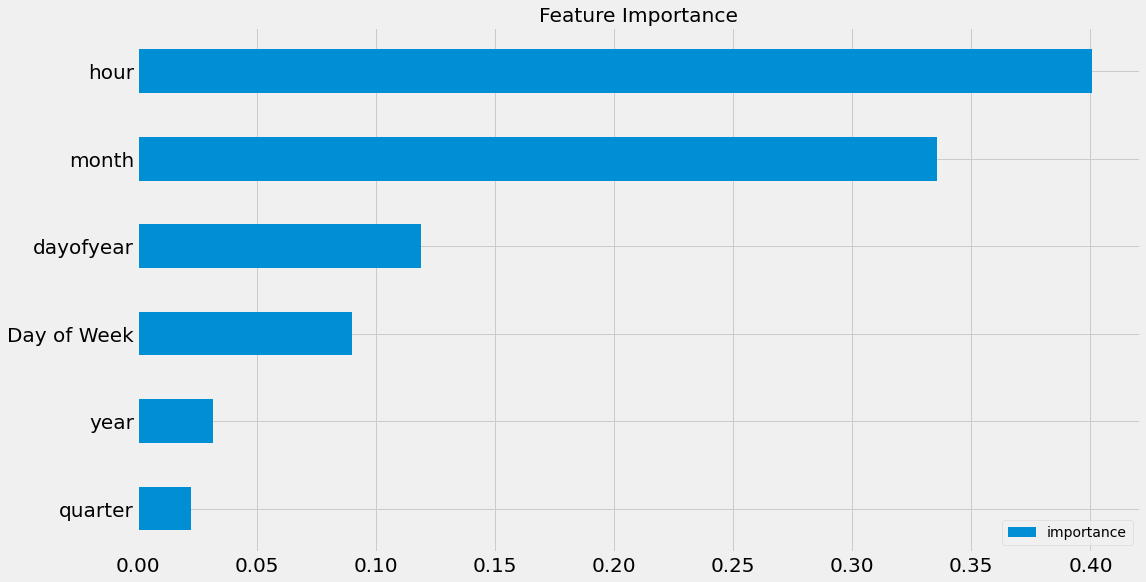

In [19]:
fi.sort_values('importance').plot(kind='barh', title = 'Feature Importance',figsize=(16,9),fontsize=(20));

## Forecasting

In [20]:
test['prediction']= reg.predict(X_test)

C:\Users\Internet-Pc\AppData\Local\Temp\ipykernel_10408\3270105426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction']= reg.predict(X_test)


In [21]:
df =df.merge(test[['prediction']], how='left', left_index=True,right_index=True)

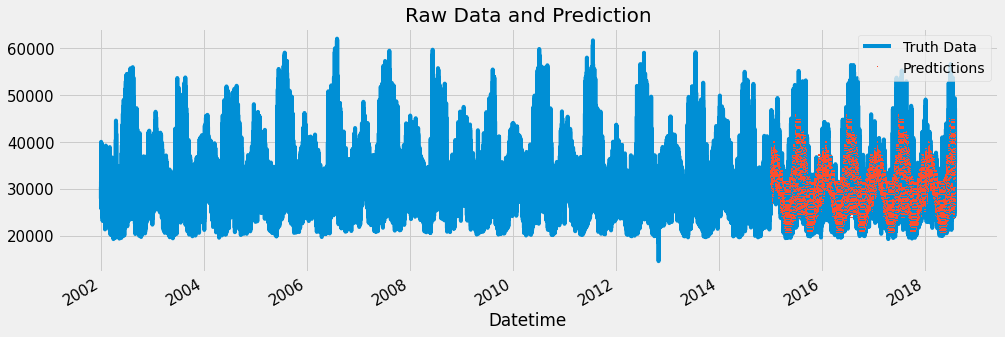

In [22]:
ax = df[['PJME_MW']].plot(figsize=(15,5))
df['prediction'].plot(ax=ax,style = ',',fontsize=(15))
plt.legend(['Truth Data','Predtictions'])
ax.set_title('Raw Data and Prediction',fontsize=(20))
plt.show()

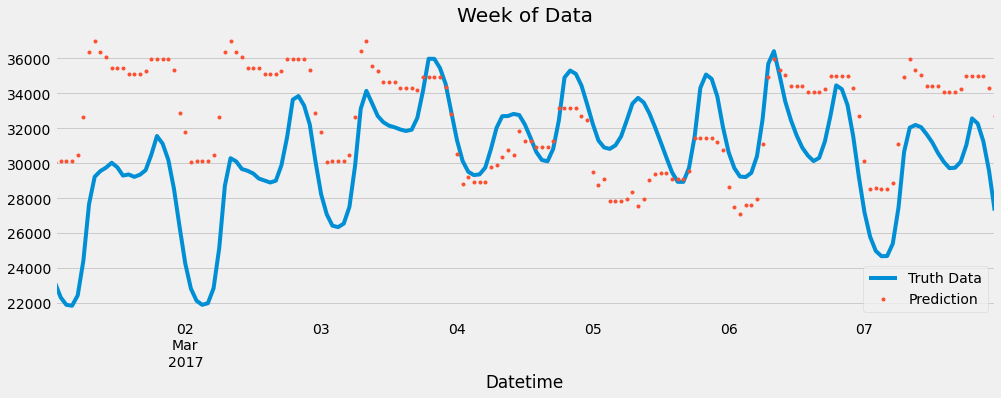

In [23]:
ax = df.loc[(df.index > '03-01-2017') &
       (df.index < '03-08-2017')]['PJME_MW'] \
    .plot(figsize = (15,5), title ='Week of Data')
df.loc[(df.index > '03-01-2017') &
       (df.index < '03-08-2017')]['prediction'] \
    .plot(style = '.')
plt.legend(['Truth Data','Prediction'])
plt.show()

In [24]:
## Lets Calculate 'RMSE'

score = np.sqrt(mean_squared_error(test['PJME_MW'],test['prediction']))
print(f'RMSE Score on Test Set:{score:0.2f}')

RMSE Score on Test Set:3763.35


## Calculate Error

In [25]:
test['error'] = np.abs(test[Target] - test['prediction'])
test['date'] = test.index.date
test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(5)

date
2016-08-13    14026.037760
2016-08-14    13533.325846
2016-09-10    13042.321940
2016-09-09    11385.571289
2015-02-20    10935.253174
Name: error, dtype: float64

## Next Steps

## 1 Outliers Analysis and removal

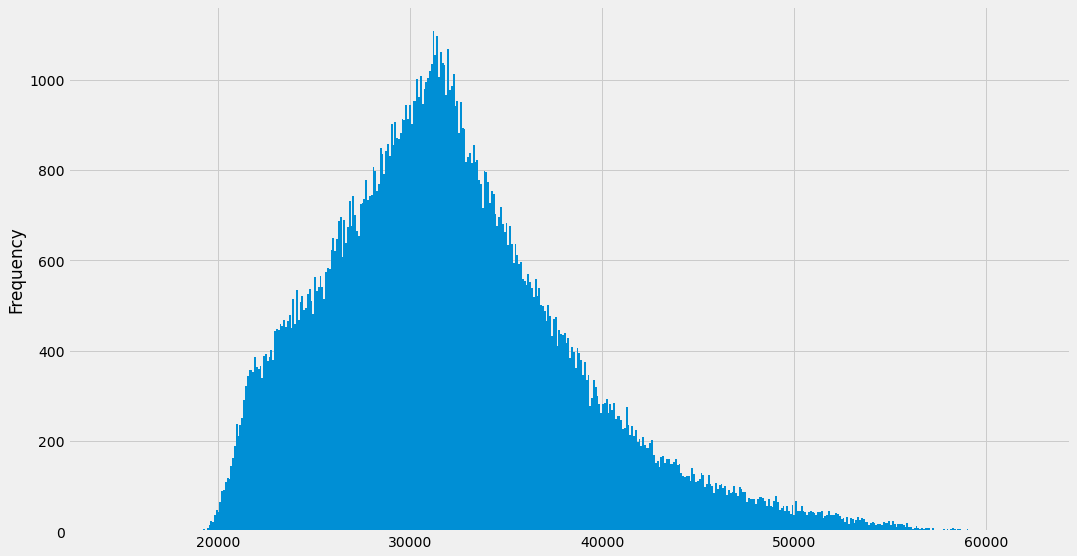

In [26]:
df['PJME_MW'].plot(kind='hist', bins=500,figsize=(16,9));

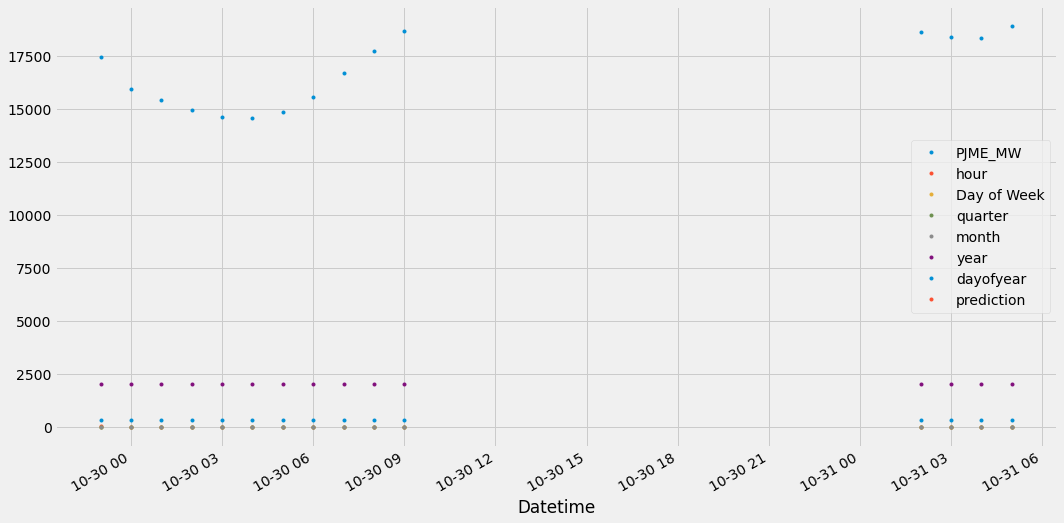

In [27]:
df.query('PJME_MW < 19_000').plot(figsize=(16,9),style = '.');

## 1.Time Series Cross Validation

In [28]:
from sklearn.model_selection import TimeSeriesSplit

In [29]:
tss = TimeSeriesSplit(n_splits=5,test_size=24*365, gap=24)
df = df.sort_index()

In [30]:
tss

TimeSeriesSplit(gap=24, max_train_size=None, n_splits=5, test_size=8760)

In [31]:
for train_idx, val_idx in tss.split(df):
    break

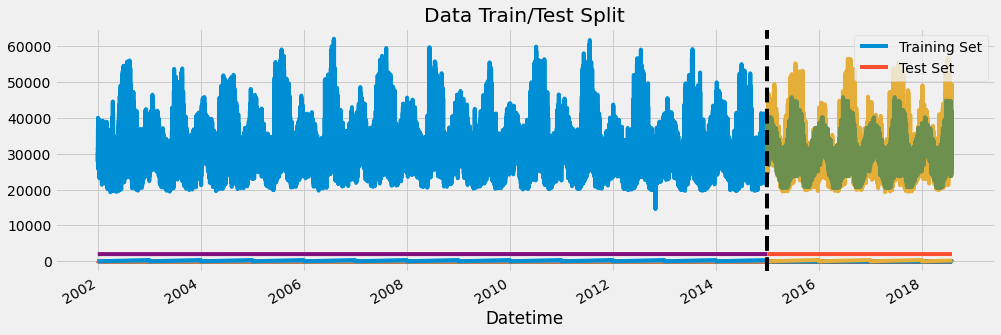

In [32]:

train = df.loc[df.index < '01-01-2015']
test = df.loc[df.index >= '01-01-2015']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2015', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [33]:
train_idx

array([     0,      1,      2, ..., 101545, 101546, 101547])

In [34]:
val_idx

array([101572, 101573, 101574, ..., 110329, 110330, 110331])